In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('laptop_data.csv')

# 1. Basic Information and Exploration¶

In [3]:
# What are the first and last 5 rows of the dataset?
df.sample()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
487,487,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,101178.72


In [4]:
# what are datatypes in each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
# Are there any missing values in the dataset? If so, how many in each column?
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Data Cleaning

In [6]:
# Are there any duplicate rows in the DataFrame?
df.duplicated().sum()

np.int64(0)

#####  How would you handle incorrect or invalid data entries (e.g., incorrect dates or non-numeric values)?
    - here i will convert ram and weight into numerical type
    - 
#####  How can you convert a column into a different data type (e.g., from string to datetime)?
    - with help of astype or to_datetime
##### - How would you deal with duplicate rows in the DataFrame?
    - just use drop_duplecates()
##### How would you handle missing data? Should you drop, fill, or leave them as is?
##### there is no missing values in Dataset

# Data Transformation 

#### How can you create new columns derived from existing ones (e.g., by performing arithmetic operations)?
    1. here ram and weight having GB and KG replace them with only numeric values and transform into original column  
    2. deleting unnamed0 column
   
#### How can you apply a custom function to each value in a column?
     3. in screenresolution column it includes wheather the laptop are touch screen or not along with resolution so we need it to separate
     4. creating Ips column from screen resolution
     5. creating x resolution and y resolution 
     

In [7]:
df.drop(columns='Unnamed: 0',inplace=True)

In [8]:
df['Ram']=df['Ram'].str.replace('GB',"")
df['Weight']=df['Weight'].str.replace('kg','')

In [9]:
df['Ram'].astype('int32')
df['Weight'].astype('float32')

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float32

In [10]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


# 3.EDA

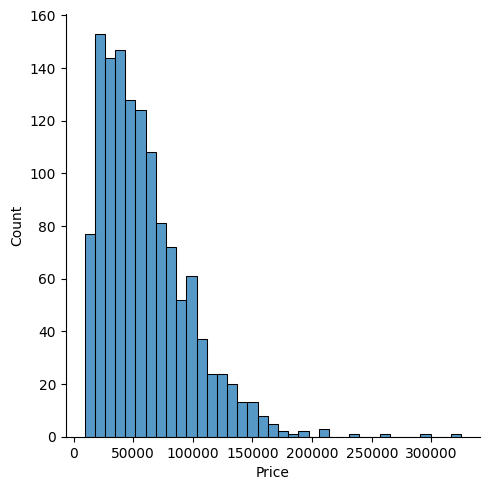

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("tab10")
sns.displot(df['Price'])

<Axes: xlabel='Company'>

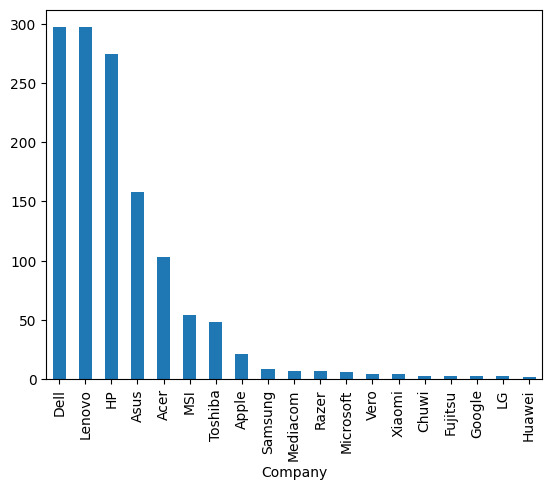

In [28]:
df['Company'].value_counts().plot(kind='bar')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10688\1578011877.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Company'],y=df['Price'],estimator=lambda x: x.mean(),palette="tab10")


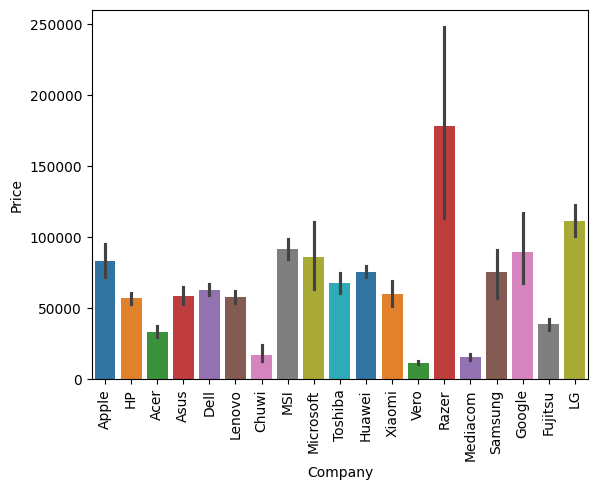

In [29]:
sns.barplot(x=df['Company'],y=df['Price'],estimator=lambda x: x.mean(),palette="tab10")
plt.xticks(rotation='vertical')
plt.show()



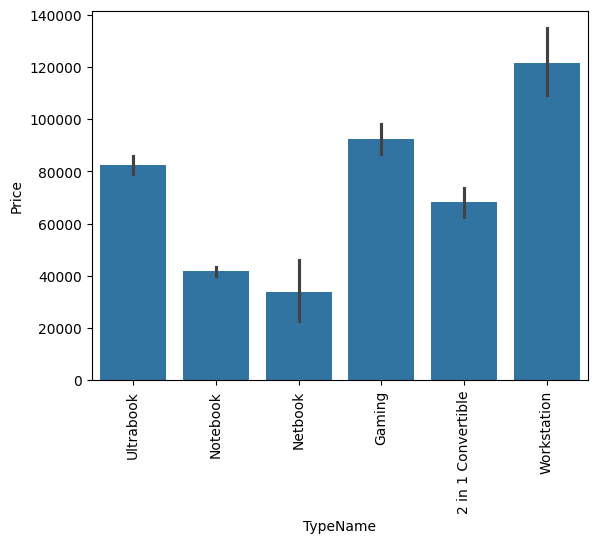

In [30]:
sns.barplot(data=df,x='TypeName',y='Price')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

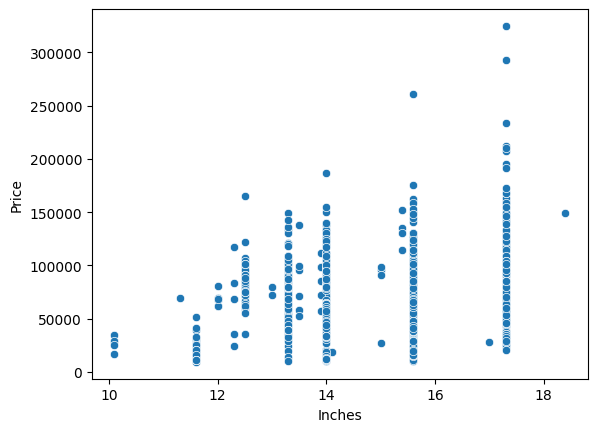

In [31]:
sns.scatterplot(data=df,x='Inches',y='Price')

In [32]:
def touchscreen_check(name):
    if 'Touchscreen' in name:
        return 1
    else:
        return 0
df['Touchscreen']=df['ScreenResolution'].apply(touchscreen_check)


<Axes: xlabel='Touchscreen'>

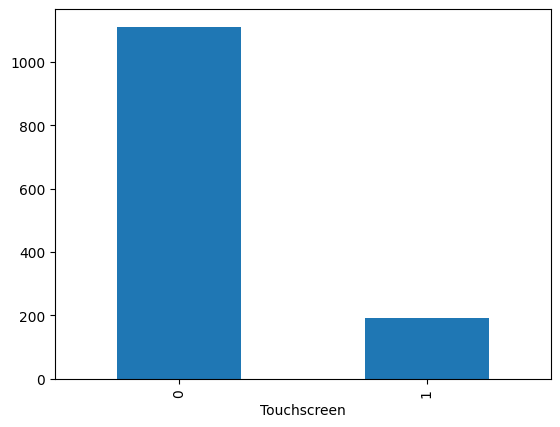

In [33]:
df['Touchscreen'].value_counts().plot(kind='bar')


<Axes: xlabel='Touchscreen', ylabel='Price'>

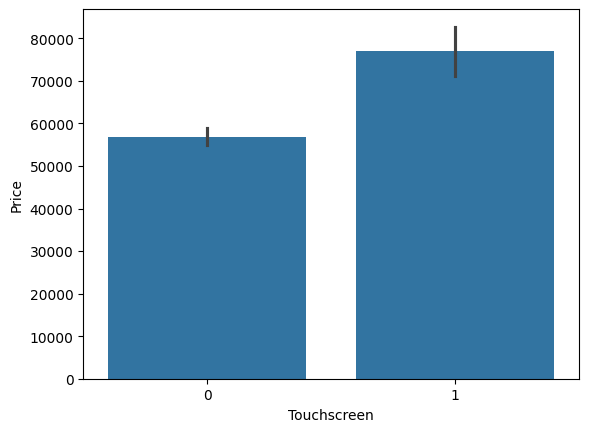

In [26]:
sns.barplot(data=df,x='Touchscreen',y='Price')

In [37]:
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

<Axes: xlabel='IPS', ylabel='Price'>

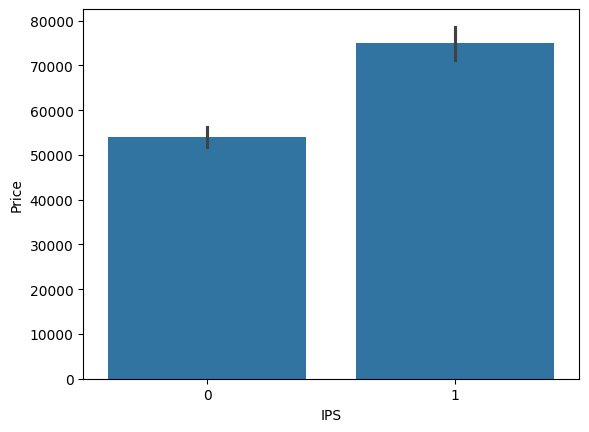

In [38]:
sns.barplot(data=df,x='IPS',y='Price')

In [68]:
x=df['ScreenResolution'].str.split('x')
x_res=pd.Series(x)
y_res=pd.Series(x)

In [76]:
x_res=x_res.apply(lambda x:x[0])
y_res=y_res.apply(lambda x:x[1])

In [82]:

def extract(name):
    temp=''
    for i in name:
        if i.isdigit():
            temp+=i
    return temp
x_res=x_res.apply(extract)

In [83]:
x_res.iloc[1300]

'1366'

In [85]:
x_res=x_res.astype('int32')
y_res=y_res.astype('int32')

ValueError: could not convert string to float: 'Apple'